# CAR PRICE PREDICTION WITH MACHINE LEARNING

__Importing Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Loading Dataset__

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.value_counts()

Car_Name           Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer        Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer        Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual    Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer        Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer        Manual        0        1
                                                                                                                  ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual    Manual        0        1
                         0.48           0.84           23000       Pe

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

__OutLier Removal__

<Axes: ylabel='Selling_Price'>

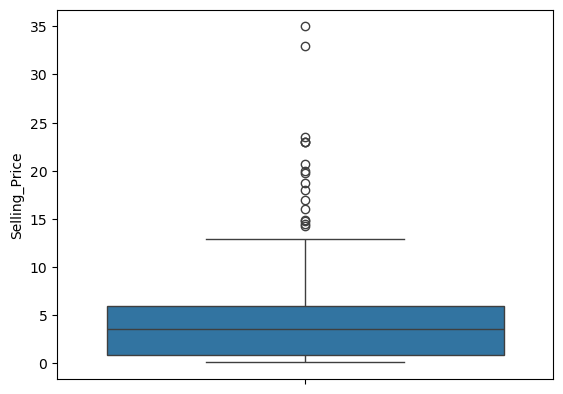

In [9]:
sns.boxplot(df["Selling_Price"])

In [10]:
sorted(df["Selling_Price"],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [11]:
df = df[~(df["Selling_Price"]>=33.0) & (df["Selling_Price"]<=35.0)]


__Label Encoder__

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
x = df[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]

In [14]:
y = df["Selling_Price"]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
x["Fuel_Type"] = label_encoder.fit_transform(x["Fuel_Type"])
x["Transmission"] = label_encoder.fit_transform(x["Transmission"])
x["Selling_type"] = label_encoder.fit_transform(x["Selling_type"])
x["Car_Name"] = label_encoder.fit_transform(x["Car_Name"])
x

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,89,2014,3.35,5.59,27000,2,0,1,0
1,92,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,95,2011,2.85,4.15,5200,2,0,1,0
4,91,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


__Standard Scalar__

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

__Splitting The Datasets__

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=50, test_size=0.2)

__Linear Regression__

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)
y_pred

array([ 4.9 ,  1.35,  0.45,  0.5 ,  2.9 ,  0.2 ,  8.99,  4.75,  0.35,
        7.5 , 10.9 ,  5.95,  0.95,  8.25,  0.48,  5.9 ,  0.4 ,  5.35,
        1.75,  4.5 , 12.5 ,  7.25,  1.  ,  0.25,  1.2 ,  0.3 ,  0.38,
        2.25,  5.5 ,  0.3 , 23.5 ,  3.  ,  2.85,  5.8 ,  5.25,  0.25,
        0.5 ,  3.  ,  0.2 ,  0.42,  8.75, 23.  ,  2.85,  3.  ,  9.65,
        8.4 ,  2.75,  0.55,  0.65,  2.35,  3.25,  2.1 ,  7.75,  3.75,
        4.95,  0.35,  1.65,  5.5 ,  4.5 ,  5.3 ])

__Evaluation__

In [23]:
from sklearn import metrics

In [24]:
score = metrics.r2_score(y_test,y_pred)
score

1.0

In [25]:
Final_data = pd.DataFrame({'Model': ['LR'], 'R2_SCORE' : ['score']})
Final_data

,Model,R2_SCORE
0,LR,score


__Prediction On New Data__

In [26]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
lr = LinearRegression()
lr.final = lr.fit(x,y)

In [28]:
import joblib

In [29]:
joblib.dump(lr.final, "Car_Price_Prediction")

['Car_Price_Prediction']

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
model = joblib.load("Car_Price_Prediction")

In [32]:
New_Data = pd.DataFrame({
    'present_price': 5.57,
    'Driven_kms' : 6000,
    'Fuel_Type' : 1,
    'Selling_type' : 0,
    'Transmission' : 0,
    'Owner' : 0,
    'Year' : 2016,
    'Car_Name' : 57,
    'Selling_Price' : 3.9},index=[0])

__New DataFrame Details:__
  - present_price: 5.57
  - Driven_kms: 6000 (the car has been driven 6000 kilometers) 
  - Fuel_Type: 1 (this is likely a numerical code, possibly for a fuel type like Petrol or Diesel)
  - Selling_type: 0 (this could represent a type of selling, such as a dealership or private sale)
  - Transmission: 0 (this could represent a transmission type, e.g., 0 for Manual, 1 for Automatic)
  - Owner: 0 (possibly the number of previous owners)
  - Year: 2016 (the year the car was made)
  - Car_Name: 57 (this is likely a label-encoded value for the car model)
  - Selling_Price: 3.9 (the selling price is 3.9, likely in lakhs or another currency unit)

In [33]:
model.predict(New_Data)

C:\Users\Sufiyan\Desktop\Data_Science\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([8.95042502])